In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, ShuffleSplit
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import import_ipynb
import common_functions
import numpy as np
import pickle

importing Jupyter notebook from common_functions.ipynb


## Functions (unique to this task)

In [2]:
def plot_crossval_boxplot(cv_scores_model1, cv_scores_model2):
    '''
    Creates a boxplot to compare the cross-validation scores of two different models
    
    Parameters:
        - cv_scores_model1 - Cross validation scores for the first model
        - cv_scores_model2 - Cross validation scores for the second model
        
    Returns:
        - None
    '''
    # Validation for the 2 arrays of scores
    if not (isinstance(cv_scores_model1, (list, np.ndarray)) and isinstance(cv_scores_model2, (list, np.ndarray))):
        raise TypeError("Both cv_scores_model1 and cv_scores_model2 must be a list/array containing numerical values.")

    # Creating the boxplot for the two models
    plt.boxplot([cv_scores_model1, cv_scores_model2], labels=['Old', 'New'])
    plt.title('Comparison of Model Cross-Validation Scores')
    plt.ylabel('Accuracy')
    plt.xlabel('Models')
    plt.show()

In [3]:
def load_file(file_name):
    '''
    Loads and returns the contents of a pickle file.
    
    Parameters:
        - file_name: The name of the pickle file to be loaded (WITHOUT THE EXTENSION)
        
    Returns:
        - file - The file object loaded from the Python file
    '''
    try:
        with open('{}.pkl'.format(file_name), 'rb') as f:
            file = pickle.load(f)
        return file
    except Exception as e:
        raise(e)

## Loading and Scaling of Data

In [4]:
# Loads and stores the data from the given datasets
x_train, x_test, y_train, y_test = common_functions.load_data()
# Scales the data in the range [10,15]
x_train_scaled, x_test_scaled, _ = common_functions.scale_data(x_train, x_test, True, 10, 15)

# Loading the model from the previous task (Task 3.2)
mlp_old = load_file('mlp_model')

x_train - Total NaNs: 0, Total Infs: 0
x_test - Total NaNs: 0, Total Infs: 0


## Cross-validation Score Computation

In [5]:
cv_params = {'n_splits': 10, 'test_size': 0.3, 'random_state': 1}
cv = ShuffleSplit(**cv_params)
cv_scores = cross_val_score(mlp_old, x_train_scaled, y_train, cv=cv, scoring='accuracy')
cv_mean = cv_scores.mean()

## Model Fitting and Prediction Generation

In [6]:
# Fitting the loaded model
mlp_old.fit(x_train_scaled, y_train)

# Generates predictions using the fitted model
y_pred_test = mlp_old.predict(x_test_scaled)
y_pred_train = mlp_old.predict(x_train_scaled)

## Model Evaluation

In [7]:
# Computes testing and training accuracies
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Generates confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred_test)
report_best = classification_report(y_test, y_pred_test)

# Displays evaluation metrics
print("Training accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)
print("Classification Report:\n", report_best)

Training accuracy: 0.8740123456790123
Testing Accuracy: 0.8566666666666667
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.94      0.87       613
         1.0       0.96      0.89      0.92       605
         2.0       0.76      0.93      0.84       628
         3.0       0.80      0.67      0.73       499
         4.0       0.90      0.92      0.91       507
         5.0       0.93      0.76      0.83       409
         6.0       0.74      0.75      0.74       481
         7.0       0.98      0.86      0.92       583
         8.0       0.80      0.84      0.82       511
         9.0       0.95      0.94      0.95       564

    accuracy                           0.86      5400
   macro avg       0.86      0.85      0.85      5400
weighted avg       0.86      0.86      0.86      5400



In [8]:
# Calculates MSE and MAE
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean square error:", round(mse,4))
print("Mean absolute error:", round(mae,4))

Mean square error: 2.9144
Mean absolute error: 0.573


## Comparison with Model from Previous Task (Hypothesis Testing)

In [9]:
# Load the cross-validation scores of the model from the previous task (Task 3.2) 
scores = load_file('scores')

# Comparing model performance through hypothesis testing
t_stat, p_value = ttest_ind(scores, cv_scores)
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Decision based on p-value
if p_value < 0.05 or p_value > 0.95:
    print("The difference in model performance is statistically significant.")
else:
    print("No significant difference in model performance.")

T-statistic: 12.813717590125833
P-value: 1.742666348186673e-10
The difference in model performance is statistically significant.


## Visualizations

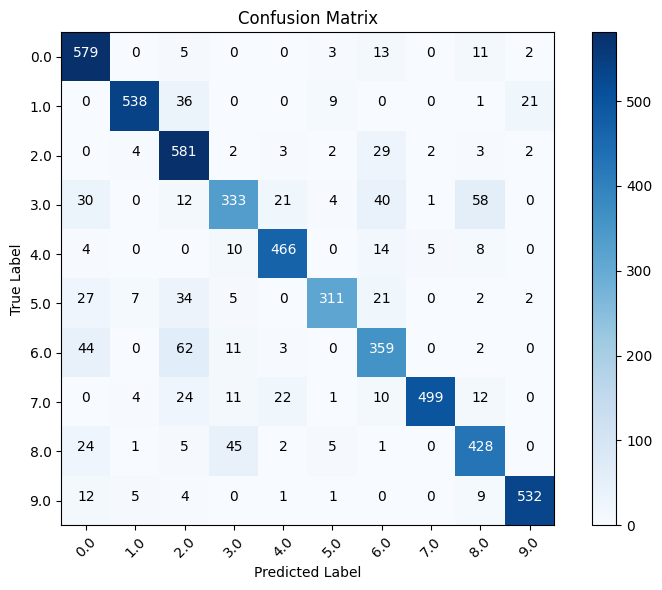

In [10]:
# Plots a confusion matrix for the new model
common_functions.plot_confusion_matrix(conf_matrix, y_test)

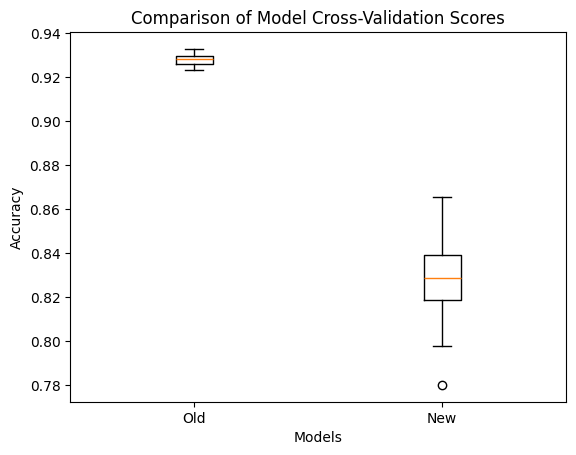

In [11]:
# Plots a boxplot to draw a comparison between the two models
plot_crossval_boxplot(scores, cv_scores)

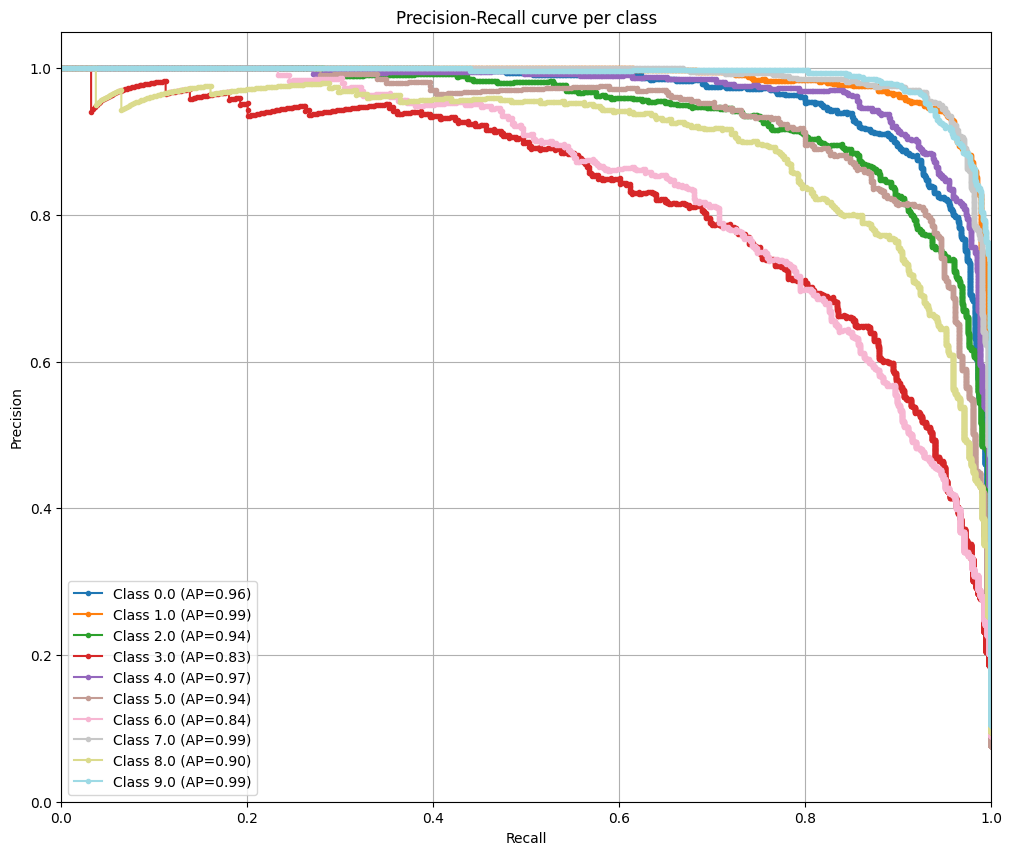

In [12]:
# Generates probability scores to be used for the preicison recall curve
probabilities = mlp_old.predict_proba(x_test_scaled)
# Plots a precision recall curve for all the 10 classes
common_functions.plot_precision_recall_curve_multiclass(y_test, probabilities, np.unique(y_train))

## Markdown Answer to Question 3.3 ii)

This task uses hypothesis testing to determine whether changing the feature scaling approach affects the performance of the implemented MLPClassifier model. The hypothesis can be defined as follows:

- **Null Hypothesis**: There is no significant difference in the model's performance when features are rescaled to the range [10, 15].
- **Alternative Hypothesis**: There is a significant difference in the model's performance when features are rescaled to the range [10, 15].

The computed p-value is extremely small (~0) which provides strong evidence against the null hypothesis. Consequently, **we reject the null hypothesis**, which implies that rescaling the features has a statistically significant impact on the model's accuracy. 
This decision is driven by the p-value, which measures the probability of observing a performance difference if the null hypothesis was accurate. A near-zero value indicates that such a result is very unlikely under the null hypothesis, which is why we reject it.